# Pandas

-    [Tabular dataset](#Tabular-dataset)  
-    [Pandas package](#Pandas-package)
-    [Create a DataFrame](#Create-a-DataFrame)  
-    [Index and select data from DataFrame](#Index-and-select-data-from-DataFrame)  

## Tabular dataset

As a data scientist, you often work with tons of data. The form of these data varies greatly, but very often you can bring them to a tabular structure, like the form of a table in a spreadsheet. 

For example, you work in a chemical plant and have a ton of temperature measurements to analyze. This data can come in this form:

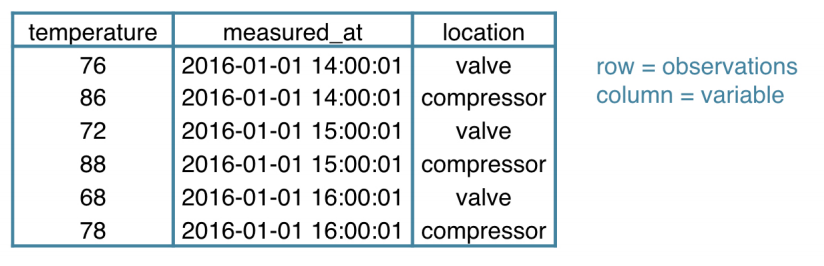

Every row is a measurement or an *observation*, and for each observation there are different variables: date and time of the measurement and location.

Another example: you have collected information on the BRICS countries and built a table with this data. Each row is an observation representing a country. Each observation has the same variables: the country name, capital, area in square km, and population in million.

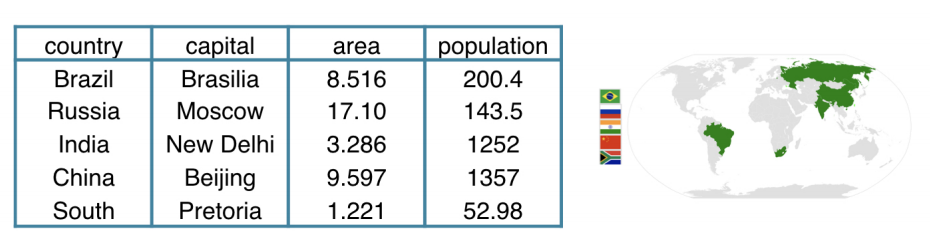

## Pandas package

To start working on this data in Python, you will need rectangular data structure. The 2D Numpy is an option, but not necessarily the best one. Numpy is not optimal for handling data that comprises of different data types.

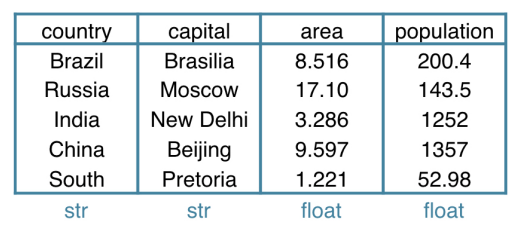

To easily and efficiently handle this data, there is the **Pandas** package. Pandas is a high-level data manipulation tool developed by Wes McKinney, built on the Numpy package. In Pandas, we store the tabular data in an object called *DataFrame*.

In [3]:
import pandas as pd
dict = {"country":["Brazil","Russia","India","China","South Africa"],
        "capital":["Brasilia","Moscow","New Delhi","Beijing","Pretoria"],
        "area":[8.516, 17.10, 3.286, 9.597, 1.221],
        "population":[200.4, 143.5, 1252, 1357, 52.98] }
brics = pd.DataFrame(dict)
brics

,country,capital,area,population
0,Brazil,Brasilia,8.516,200.40
1,Russia,Moscow,17.100,143.50
2,India,New Delhi,3.286,1252.00
3,China,Beijing,9.597,1357.00
4,South Africa,Pretoria,1.221,52.98


The resulting pandas DataFrame is similar to the table, with rows for observations and columns for variables. However, pandas automatically assigns row labels, from 0 to 4. To specify them manually, you can set the index  attribute to a list with correct labels.

In [4]:
brics.index = ["BR", "RU", "IN", "CH", "SA"]
brics

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


## Create a DataFrame

There are different ways to built a DataFrame, manually from a dictionary like in the example `brics`. But the typical case is not building DataFames manually but importing them from an external file that contains all this data. 

The `brics` data is stored in a *csv* (comma separate value) file that can be imported via pandas using the `read_csv()` function. Pass the path to the csv file as an argument:

In [5]:
brics = pd.read_csv("https://raw.githubusercontent.com/ltrangng/Py_01_DataCamp/main/0_data/brics.csv")
brics

,Unnamed: 0,country,capital,area,population
0,BR,Brazil,Brasilia,8.516,200.40
1,RU,Russia,Moscow,17.100,143.50
2,IN,India,New Delhi,3.286,1252.00
3,CH,China,Beijing,9.597,1357.00
4,SA,South Africa,Pretoria,1.221,52.98


The row labels are still seen as in their own column, which is not our intention. To solve this, we have to specify in `read_csv()` function that the first column contains the row indexes.

In [6]:
brics = pd.read_csv("https://raw.githubusercontent.com/ltrangng/Py_01_DataCamp/main/0_data/brics.csv", index_col = 0)
brics

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


To understand more how a dataframe is built, create manually a dataframe with vehicle data from different countries. Each observation corresponds to a country and the columns give information about the number of vehicles per capita, whether people drive left or right, and so on. 

-    `names`: contains the country names for which data is available.  
-    `dr`: a list with booleans that tells whether people drive left or right in the corresponding country.  
-    `cpc`: the number of motor vehicles per 1000 people in the corresponding country.

In [7]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt'] names for which data is available.
dr =  [True, False, False, False, True, True, True] 
cpc = [809, 731, 588, 18, 200, 70, 45]

Create a dictionary with these 3 key-values and a list for row labels:

In [12]:
my_dict = {"country":names, "drives_right": dr, "cars_per_cap": cpc}
row_labels = ['US', 'AUS', 'JPN', 'IN', 'RU', 'MOR', 'EG']

Use `DataFrame()` function to turn the dictionary into a DataFrame:

In [13]:
cars = pd.DataFrame(my_dict)
cars.index = row_labels
cars

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JPN,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


Putting data in a dictionary and then building a DataFrame works, but it's not very efficient. What if you're dealing with millions of observations? Instead import the csv as a DataFrame:

In [16]:
cars = pd.read_csv("https://raw.githubusercontent.com/ltrangng/Py_01_DataCamp/main/0_data/cars.csv", index_col = 0)
cars

,cars_per_cap,country,drives_right
US,809,United States,True
AUS,731,Australia,False
JAP,588,Japan,False
IN,18,India,False
RU,200,Russia,True
MOR,70,Morocco,True
EG,45,Egypt,True


## Index and select data from DataFrame 

`[]` and column label allows to access columns in a DataFrame. Suppose you want to select the country names in `brics`:

In [17]:
brics["country"]

BR          Brazil
RU          Russia
IN           India
CH           China
SA    South Africa
Name: country, dtype: object

The result is not a sub-DataFrame as expected, but a Pandas series. A Pandas serie is like a 1D array that can be labeled, just like a DataFrame. If you put more Pandas series together, you can create a DataFrame. 

In [18]:
type(brics["country"])

pandas.core.series.Series

If you want to select the country column but keep the data in a DataFrame, you need double `[[]]`.

In [19]:
brics[["country"]]

,country
BR,Brazil
RU,Russia
IN,India
CH,China
SA,South Africa


In [20]:
type(brics[["country"]])

pandas.core.frame.DataFrame

Select more columns by using `,` between column labels:

In [21]:
brics[["country", "capital"]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


`[]` and a slice of integer index allow to access rows. 

In [28]:
brics[1:4]

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


Use `[[]]` s to print out a DataFrame with both the country and drives_right columns of `cars`:

In [47]:
cars[["country", "drives_right"]]

,country,drives_right
US,United States,True
AUS,Australia,False
JAP,Japan,False
IN,India,False
RU,Russia,True
MOR,Morocco,True
EG,Egypt,True


Select the first 3 observations from `cars` and print them out:

In [50]:
print(cars[0:3])

     cars_per_cap        country  drives_right
US            809  United States          True
AUS           731      Australia         False
JAP           588          Japan         False


The `[]` works, but only offers a limited functionality. Ideally we want indexing similar like in 2D Numpy array with `[row, column]`. For that we need to extend the toolbox in Pandas with the `loc` and `iloc` functions. 

-    `loc` is a technique to select parts of your data based on labels.  
-    `iloc` is position-based

In [31]:
brics.loc[["RU", "IN", "CH"]] 

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


The selection is similar with `[[]]` technique, but `loc` is more versatile. You can select both rows and column at the same time. the subsetting is very similar to 2D Numpy arrays, only that `loc` uses labels, not the position of the elements.

In [32]:
brics.loc[["RU", "IN", "CH"], ["country", "capital"]]

,country,capital
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


To select the entire column, specify it with slicing `:` 

In [36]:
brics.loc[:,["country", "capital"]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


If you want to subset a subset of DataFrame based on their position, or index, `iloc` works similarly to `loc`.

In [38]:
brics.iloc[[1]]

,country,capital,area,population
RU,Russia,Moscow,17.1,143.5


In [41]:
brics.iloc[[1, 2, 3]]

,country,capital,area,population
RU,Russia,Moscow,17.100,143.5
IN,India,New Delhi,3.286,1252.0
CH,China,Beijing,9.597,1357.0


In [43]:
brics.iloc[[1, 2, 3], [0, 1]]

,country,capital
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing


You can also keep all rows or columns in similar fashion.

In [45]:
brics.iloc[:,[0, 1]]

,country,capital
BR,Brazil,Brasilia
RU,Russia,Moscow
IN,India,New Delhi
CH,China,Beijing
SA,South Africa,Pretoria


Use `loc` or `iloc` to select the observation corresponding to Japan in `cars`:

In [56]:
cars.loc[["JAP"]]
cars.iloc[[2]]

,cars_per_cap,country,drives_right
JAP,588,Japan,False


Use `loc` or `iloc` to select the observations for Australia and Egypt:

In [58]:
cars.loc[["AUS", "EG"]]
cars.iloc[[1, 6]]

,cars_per_cap,country,drives_right
AUS,731,Australia,False
EG,45,Egypt,True


Print out the `drives_right` value of the row corresponding to Morocco:

In [59]:
print(cars.loc["MOR", "drives_right"])

True


Print out a sub-DataFrame, containing the observations for Russia and Morocco and the columns `country` and `drives_right`:

In [60]:
print(cars.loc[["RU", "MOR"], ["country", "drives_right"]])

     country  drives_right
RU    Russia          True
MOR  Morocco          True


Print out both the `cars_per_cap` and `drives_right` column as a DataFrame using `loc` or `iloc`:

In [61]:
print(cars.loc[:,["cars_per_cap", "drives_right"]])
print(cars.iloc[:, [1,-1]])

     cars_per_cap  drives_right
US            809          True
AUS           731         False
JAP           588         False
IN             18         False
RU            200          True
MOR            70          True
EG             45          True
           country  drives_right
US   United States          True
AUS      Australia         False
JAP          Japan         False
IN           India         False
RU          Russia          True
MOR        Morocco          True
EG           Egypt          True
